# **Análisis de Apple (AAPL) con yfinance**  
*Documento Colab Notebook (`.ipynb`)*  

A continuación, te proporciono el código completo para un análisis integral de Apple (AAPL) utilizando `yfinance`, incluyendo:  
1. **Datos históricos** (precios, splits, dividendos).  
2. **Información financiera clave** (métricas, recomendaciones).  
3. **Visualizaciones básicas**.  

---

## **1. Configuración inicial**  
```python
# Instalar yfinance si no está disponible
# Si tienes una versión local de python,
# como Python Anaconda, primero instala la
# Librerìa yfinance.
!pip install yfinance matplotlib --quiet

# Importar librerías
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

```

---

## **2. Obtener datos de AAPL**  
```python
# Crear objeto Ticker
apple = yf.Ticker("AAPL")

# Descargar histórico de 1 año (ajustado por splits y dividendos)
hist = apple.history(period="1y", auto_adjust=True)

# Obtener información financiera
info = apple.info
dividends = apple.dividends
splits = apple.splits
recommendations = apple.recommendations
recommendations_summary = apple.recommendations_summary
```
El método **`apple.info`** (donde `apple = yf.Ticker("AAPL")`) devuelve un **diccionario** con información detallada y actualizada sobre la empresa Apple (AAPL), incluyendo datos financieros, métricas clave, metadatos y detalles operativos. Esta información es útil para análisis fundamental, valoración de acciones y comprensión del negocio.

---

### **¿Qué información incluye?**
El diccionario contiene **más de 100 campos**, pero los más relevantes se agrupan en:

#### **1. Datos básicos de la empresa**
- **`symbol`**: Símbolo bursátil (ej. `"AAPL"`).
- **`longName`**: Nombre completo (`"Apple Inc."`).
- **`sector`**: Sector (`"Technology"`).
- **`industry`**: Industria específica (`"Consumer Electronics"`).
- **`country`**: País (`"United States"`).
- **`website`**: URL corporativa (`"https://www.apple.com"`).

#### **2. Precios y mercado**
- **`currentPrice`**: Precio actual (ej. `189.50` USD).
- **`marketCap`**: Capitalización bursátil (ej. `2.9T` para 2.9 billones USD).
- **`volume`**: Volumen de negociación reciente.
- **`52WeekHigh`** y **`52WeekLow`**: Rango de precios del último año.

#### **3. Finanzas clave**
- **`trailingPE`**: Ratio P/E (Price-to-Earnings) trailing.
- **`forwardPE`**: P/E proyectado.
- **`profitMargins`**: Margen de beneficio neto (ej. `0.25` = 25%).
- **`totalRevenue`**: Ingresos totales (en miles de millones).
- **`ebitda`**: EBITDA (beneficios antes de intereses, impuestos, depreciación y amortización).
- **`impliedSharesOutstanding`**: Calculated from a company's total valuation in a deal (M&A) and then divided by the price offered per share.

#### **4. Dividendos y rentabilidad**
- **`dividendYield`**: How much a company pays out in dividends each year relative to its current share price in percentage. The return on investment from dividends as a percentage of the current stock price. A standardized way to compare the dividend-only return of different stocks, regardless of their price. Dividend Yield = (Annual Dividends Per Share / Current Share Price) x 100  is expresed in Percentage already(ej. `0.02` = 0.02%).
- **`payoutRatio`**: Porcentaje de ganancias destinado a dividendos.
- **`dividendRate`**: Dividendo anualizado por acción. Is the dollar amount a company pays per share in dividends, is expressed as a dollar amount (e.g., \(\$1.50\) per share). Calculated: By multiplying the most recent dividend payment by the number of payments in a year (e.g., \(\$0.50\) quarterly payment \(\times \) 4).

#### **5. Gestión y accionariado**
- **`heldPercentInsiders`**: % de acciones en manos de insiders.
- **`heldPercentInstitutions`**: % en manos de fondos institucionales.

#### **6. Otros datos útiles**
- **`sharesOutstanding`**: Acciones en circulación. Includes all common and preferred shares held by investors, while excluding shares repurchased by the company (treasury shares).
- **`beta`**: Volatilidad vs. mercado (1 = neutral, >1 = más volátil).
- **`currency`**: Moneda de cotización (`"USD"`).

---

### **Ejemplo de uso**
```python
import yfinance as yf

apple = yf.Ticker("AAPL")
info = apple.info

# Acceder a campos específicos:
print(f"Nombre: {info['longName']}")
print(f"Precio: {info['currentPrice']} USD")
print(f"Dividend Yield: {info['dividendYield'] * 100:.2f}%")
```

---

### **¿Para qué sirve?**
- **Análisis fundamental**: Evaluar si la acción está sobrevalorada o infravalorada (con ratios como P/E, P/B).
- **Comparativas**: Contrastar Apple con otras empresas del sector.
- **Toma de decisiones**: Inversores usan estos datos para decidir comprar/vender.

---

### **Notas importantes**
1. **Algunos campos pueden ser `None`** si no hay datos disponibles.
2. **La información se actualiza** en tiempo real (dependiendo de la conexión a Yahoo Finance).
3. **No incluye datos históricos** (para eso está `apple.history()`).



⸻
### Referencias Adicionales

📌 Ratio P/E (Price-to-Earnings, Precio/Beneficio)
* Definición:
Mide cuánto están dispuestos a pagar los inversionistas por cada dólar de beneficio neto que genera una empresa.
$$
P/E = \frac{\text{Precio de la acción}}{\text{Beneficio por acción (EPS)}}
$$
* Interpretación:
  * P/E alto → los inversores esperan alto crecimiento futuro, pero también puede significar que la acción está sobrevalorada.
  * P/E bajo → puede indicar que la acción está infravalorada o que la empresa enfrenta problemas (el mercado no espera crecimiento).
  * Ejemplo:
Si una acción vale \$50 y el EPS es de \$5:
$$P/E = 50 / 5 = 10$$
→ El mercado paga 10 veces las ganancias anuales por acción.

⸻

📌 Ratio P/B (Price-to-Book, Precio/Valor en Libros)
* Definición:
Compara el precio de mercado de la acción con el valor contable por acción (patrimonio neto / número de acciones).
$$
P/B = \frac{\text{Precio de la acción}}{\text{Valor contable por acción}}
$$
* Interpretación:
  * P/B > 1 → el mercado valora la empresa por encima de su valor contable (se espera creación de valor futuro, intangibles importantes, marca, patentes).
  * P/B < 1 → la acción cotiza por debajo de su valor contable → posible señal de infravaloración o problemas financieros.
  * Ejemplo:
  Precio de la acción: \$20.
  Valor contable por acción: \$25.
$$P/B = 20 / 25 = 0.8$$
→ El mercado valora la empresa por debajo de sus activos netos, posible oportunidad de compra.

⸻

🔎 Uso en Análisis Fundamental
* Estos ratios se usan juntos, comparando con:
	1.	La media histórica de la empresa.
	2.	El promedio del sector/industria.
	3.	El mercado en general (ej. S&P500).
* Reglas prácticas:
	* P/E muy alto (ej. >30) puede señalar sobrevaloración → solo justificable en empresas de crecimiento.
	* P/B menor a 1 puede señalar infravaloración → pero hay que verificar si los activos son realmente líquidos o productivos.


---

## **3. Análisis de datos**  

### **3.1. Precios históricos**  
```python
print("\nÚltimos 5 registros de precios:")
print(hist.tail())

# Gráfico de precios de cierre
plt.figure(figsize=(12, 6))
hist['Close'].plot(title="Precio de AAPL (último año)", color='green')
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.grid(True)
plt.show()
```

### **3.2. Dividendos**  
```python
print("\nDividendos pagados en el último año:")
print(dividends.tail())

if not dividends.empty:
    plt.figure(figsize=(12, 4))
    dividends.plot(kind='bar', title="Dividendos de AAPL", color='blue')
    plt.ylabel("Monto por acción (USD)")
    plt.grid(axis='y')
    plt.show()
else:
    print("No hay datos de dividendos recientes.")
```

El código que has compartido utiliza la biblioteca `yfinance` para obtener información financiera de Apple (AAPL). Vamos a explicar específicamente qué información te proporciona `apple.dividends`:

### `apple.dividends`
Esta propiedad devuelve un **Serie de pandas** con el historial de dividendos pagados por Apple (AAPL). Los dividendos son pagos que una empresa realiza a sus accionistas, generalmente como una distribución de las ganancias.

#### Información que incluye:
1. **Fecha del dividendo (índice del Serie)**: La fecha en la que se pagó el dividendo.
2. **Monto del dividendo**: La cantidad de dinero pagado por acción (generalmente en USD para acciones estadounidenses).

#### Ejemplo de cómo se vería la salida:
```
Date
2023-02-10    0.23
2023-05-12    0.24
2023-08-11    0.24
2023-11-10    0.24
Name: Dividends, dtype: float64
```
(Nota: Los valores exactos dependen de los dividendos recientes de Apple).

#### Interpretación:
- Apple paga dividendos **trimestralmente** (4 veces al año).
- Los montos suelen ser similares en cada trimestre, pero pueden variar si la empresa decide aumentarlos o reducirlos.
- Las fechas de pago suelen ser en febrero, mayo, agosto y noviembre (esto puede cambiar).

#### ¿Para qué sirve esta información?
- **Inversores en dividendos**: Para calcular el rendimiento por dividendo (dividend yield) o ingresos pasivos.
- **Análisis histórico**: Ver si la empresa ha aumentado sus dividendos con el tiempo (señal de salud financiera).
- **Backtesting**: Evaluar estrategias de inversión que incluyan dividendos.

#### Relación con `hist`:
El `hist` que obtienes con `apple.history(period="1y")` contiene el precio histórico, pero **no incluye los dividendos** a menos que especifiques `auto_adjust=True`. Si quieres un análisis completo, es importante considerar tanto los precios como los dividendos.


### **3.3. Splits (divisiones de acciones)**  
```python
print("\nHistorial de splits:")
print(splits)

if not splits.empty:
    print(f"\nÚltimo split: {splits.index[-1].date()} - Ratio {splits[-1]}:1")
else:
    print("No hay splits recientes.")
```

La instrucción **`apple.splits`** en la biblioteca `yfinance` devuelve un **historial de splits (divisiones de acciones)** realizados por Apple (AAPL). Un **split** es un ajuste que hace una empresa para aumentar o disminuir el número de acciones en circulación, modificando su precio proporcionalmente sin alterar su valor de mercado total.

---

### **¿Qué es un Split?**
- **Split (división de acciones)**:  
  - **Ejemplo:** Un *split 4:1* significa que por cada acción que tenías, ahora tendrás 4, pero cada una valdrá 1/4 del precio anterior.  
  - **Objetivo:** Hacer las acciones más accesibles (si el precio es muy alto) o ajustar su liquidez.  
- **Reverse Split (contracción de acciones)**:  
  - Lo contrario: reducir el número de acciones y aumentar su precio (común en empresas con precios muy bajos).  

---

### **Datos que devuelve `apple.splits`**
- **Formato:** Un **Serie de pandas** donde:  
  - **Índice (index):** Fecha del split.  
  - **Valor:** Proporción del split (ej. `2` = split 2:1, `0.5` = reverse split 1:2).  

#### **Ejemplo de salida:**
```python
Date
2020-08-31    4.0  
2014-06-09    7.0  
2005-02-28    2.0  
Name: Splits, dtype: float64
```
(Estos son ejemplos históricos reales de AAPL).  

---

### **Interpretación del ejemplo**
1. **Split 4:1 (31/08/2020):**  
   - Si tenías **1 acción a $400**, después del split tuviste **4 acciones a $100** cada una.  
   - El valor total seguía siendo $400, pero con más acciones a menor precio.  
2. **Split 7:1 (09/06/2014):**  
   - Similar al anterior, pero con una proporción mayor.  

---

### **¿Para qué sirve esta información?**
1. **Ajustar datos históricos:**  
   - Los precios antiguos deben dividirse por el factor de split para compararlos correctamente con los actuales (ej. si AAPL cotizaba a $700 antes del split 7:1, equivale a $100 hoy).  
2. **Entender la política de la empresa:**  
   - Los splits suelen hacerse cuando el precio por acción es muy alto (como AAPL, que ha superado los $1000 pre-split).  
3. **Backtesting de estrategias:**  
   - Para análisis técnico o modelos de machine learning, los splits deben ser considerados para evitar distorsiones en los datos.  

---

### **Relación con `apple.history()`**
- Los precios en `apple.history()` **no están ajustados por splits** por defecto. Si quieres datos consistentes, usa:  
  ```python
  hist = apple.history(period="max", auto_adjust=True)  # Ajusta automáticamente splits y dividendos
  ```

Si necesitas más detalles (como el impacto de un split específico), ¡avísame!


### **3.4. Información financiera clave**  
```python
# Extraer métricas importantes
metrics = {
    "Nombre": info['longName'],
    "Sector": info['sector'],
    "Precio Actual (USD)": info['currentPrice'],
    "Market Cap (B)": round(info['marketCap'] / 1e9, 2),
    "P/E Ratio": info['trailingPE'],
    "Dividend Yield": f"{info['dividendYield'] * 100:.2f}%",
    "Beta (Volatilidad)": info['beta']
}

print("\nMétricas clave de AAPL:")
pd.DataFrame.from_dict(metrics, orient='index', columns=['Valor'])
```

### **3.5. Recomendaciones de analistas**  
```python
print("\nResumen de recomendaciones:")
print(recommendations_summary)

# Gráfico de tendencia de recomendaciones
if not recommendations.empty:
    plt.figure(figsize=(12, 6))
    recommendations['To Grade'].value_counts().plot(
        kind='pie', autopct='%1.1f%%',
        title="Distribución de Recomendaciones (Últimos 3 Meses)"
    )
    plt.show()
```

Esta tabla muestra un **resumen de recomendaciones de analistas** para la acción de Apple (AAPL) en los últimos meses, agrupadas por categorías de valoración (`strongBuy`, `buy`, `hold`, `sell`, `strongSell`) y periodos de tiempo (`0m`, `-1m`, `-2m`, `-3m`). Aquí está el desglose detallado:

---

### **Explicación de las columnas:**
1. **`period`**:  
   - Indica el período de tiempo evaluado:  
     - `0m`: **Mes actual** (últimos 30 días).  
     - `-1m`: **Hace 1 mes** (30-60 días atrás).  
     - `-2m`: **Hace 2 meses** (60-90 días atrás).  
     - `-3m`: **Hace 3 meses** (90-120 días atrás).  

2. **Categorías de recomendación**:  
   - `strongBuy`: Recomendación **muy positiva** (equivalente a "Compra fuerte").  
   - `buy`: Recomendación **positiva** ("Compra").  
   - `hold`: Recomendación **neutral** ("Mantener").  
   - `sell`: Recomendación **negativa** ("Vender").  
   - `strongSell`: Recomendación **muy negativa** ("Vender fuerte").  

   *(Los números representan la **cantidad de analistas** que emitieron cada tipo de recomendación en ese período)*.

---

### **Interpretación de los datos proporcionados:**
| Periodo | strongBuy | buy | hold | sell | strongSell |  
|---------|----------|-----|------|------|-----------|  
| **0m**  | 4        | 22  | 15   | 1    | 1         |  
| **-1m** | 5        | 23  | 15   | 1    | 1         |  
| **-2m** | 6        | 22  | 16   | 2    | 1         |  
| **-3m** | 7        | 22  | 15   | 2    | 1         |  

#### **Tendencias clave:**
1. **Predominio de opiniones positivas**:  
   - Las categorías `buy` + `strongBuy` suman **más del 60%** de las recomendaciones en todos los períodos.  
   - Ejemplo: En el mes actual (`0m`), hay **26 recomendaciones positivas** (4 `strongBuy` + 22 `buy`) vs. **2 negativas** (1 `sell` + 1 `strongSell`).  

2. **Leve disminución en optimismo**:  
   - Los `strongBuy` bajaron de **7 a 4** en los últimos 3 meses.  
   - Los `hold` se mantienen estables (~15-16), lo que sugiere que algunos analistas se volvieron más cautelosos.  

3. **Opiniones negativas mínimas**:  
   - Las recomendaciones `sell`/`strongSell` son marginales (1-2 analistas), lo que indica **bajo pesimismo** en el mercado.  

---

### **¿Para qué sirve esta información?**
- **Sentimiento del mercado**:  
  - Un alto número de `buy`/`strongBuy` sugiere **consenso alcista** sobre AAPL.  
  - La reducción en `strongBuy` podría señalar que algunos analistas ven menos margen de subida.  
- **Comparación histórica**:  
  - Si en `-3m` había 7 `strongBuy` y ahora hay 4, podría reflejar un **enfriamiento en el entusiasmo**.  
- **Toma de decisiones**:  
  - Inversores usan esto para confirmar tendencias o detectar posibles cambios de rumbo.  

---

### **Ejemplo de cómo usarla:**
```python
import yfinance as yf

apple = yf.Ticker("AAPL")
recommendations = apple.recommendations_summary

# Filtrar solo el mes actual:
current_month = recommendations[recommendations['period'] == '0m']
print(current_month)
```

---

### **Notas adicionales:**
- Los datos son **agregados** por Yahoo Finance a partir de informes de múltiples firmas (Morgan Stanley, Goldman Sachs, etc.).  
- Puedes cruzar esta información con `apple.recommendations` para ver detalles de cada análisis.  
- Si hay un aumento repentino en `sell`/`strongSell`, podría ser señal de alerta.  


---

## **4. Exportar resultados (Opcional)**  
```python
# Guardar datos en un Excel
with pd.ExcelWriter('AAPL_Analysis.xlsx') as writer:
    hist.index = hist.index.astype(str)
    hist.to_excel('hist_data_string_dates.xlsx', sheet_name='Histórico')
    pd.DataFrame.from_dict(info, orient='index').to_excel(writer, sheet_name='Info')
    recommendations.to_excel(writer, sheet_name='Recomendaciones')
```

---

## **5. Resultados esperados**  
1. **Gráficos interactivos** de precios, dividendos y recomendaciones.  
2. **Tablas resumen** con métricas financieras.  
3. **Archivo Excel** con los datos crudos (opcional).  

---

### **Notas adicionales**  
- Para actualizar los datos, ejecuta nuevamente las celdas.  
- Si necesitas ampliar el análisis (ej. comparar con competidores), añade:  
  ```python
  msft = yf.Ticker("MSFT")
  google = yf.Ticker("GOOGL")
  ```


## Ejemplo en Python

In [1]:
import time

import yfinance as yf
print(yf.__version__)
import pandas as pd
import matplotlib.pyplot as plt

ticker = "TSLA"
# Crear objeto Ticker
df = yf.Ticker(ticker)

# Descargar histórico de 1 año (ajustado por splits y dividendos)
hist = df.history(period="1y", auto_adjust=True)

# Obtener información financiera
info = df.info
dividends = df.dividends
splits = df.splits
recommendations = df.recommendations
recommendations_summary = df.recommendations_summary


0.2.65


In [2]:
import json

# Imprime info en formato json visible correctamente
# similar a JSON to String
print(json.dumps(info, indent=4))

{
    "address1": "1 Tesla Road",
    "city": "Austin",
    "state": "TX",
    "zip": "78725",
    "country": "United States",
    "phone": "512 516 8177",
    "website": "https://www.tesla.com",
    "industry": "Auto Manufacturers",
    "industryKey": "auto-manufacturers",
    "industryDisp": "Auto Manufacturers",
    "sector": "Consumer Cyclical",
    "sectorKey": "consumer-cyclical",
    "sectorDisp": "Consumer Cyclical",
    "longBusinessSummary": "Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport ut


Últimos 5 registros de precios:
                                 Open        High         Low       Close  \
Date                                                                        
2025-11-14 00:00:00-05:00  386.299988  412.190002  382.779999  404.350006   
2025-11-17 00:00:00-05:00  398.739990  423.959991  398.739990  408.920013   
2025-11-18 00:00:00-05:00  405.380005  408.899994  393.709991  401.250000   
2025-11-19 00:00:00-05:00  406.179993  411.779999  398.500000  403.989990   
2025-11-20 00:00:00-05:00  414.630005  428.940002  407.410095  409.570007   

                              Volume  Dividends  Stock Splits  
Date                                                           
2025-11-14 00:00:00-05:00  105506700        0.0           0.0  
2025-11-17 00:00:00-05:00  102214300        0.0           0.0  
2025-11-18 00:00:00-05:00   80688600        0.0           0.0  
2025-11-19 00:00:00-05:00   71542400        0.0           0.0  
2025-11-20 00:00:00-05:00   55133244       

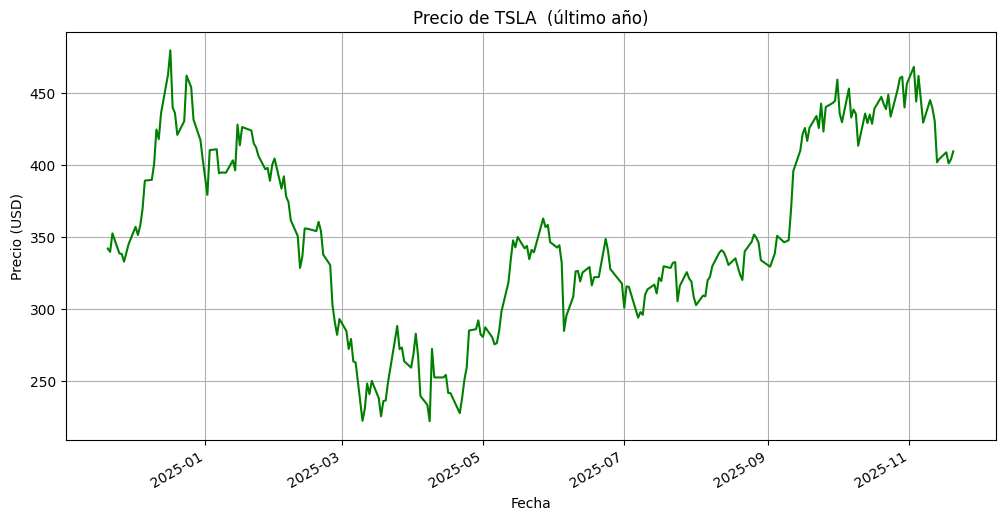

In [3]:
print("\nÚltimos 5 registros de precios:")
print(hist.tail())

# Gráfico de precios de cierre
plt.figure(figsize=(12, 6))
hist['Close'].plot(title=f"Precio de {ticker}  (último año)", color='green')
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.grid(True)
plt.show()

In [4]:
dividends

Series([], Name: Dividends, dtype: float64)

In [5]:
splits

Date
2020-08-31 00:00:00-04:00    5.0
2022-08-25 00:00:00-04:00    3.0
Name: Stock Splits, dtype: float64

In [6]:
recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,5,15,17,7,3
1,-1m,5,15,17,7,3
2,-2m,5,15,17,6,2
3,-3m,5,14,18,7,3


In [7]:

# Guardar datos en un Excel en tres hojas: Historico, Info y Recomendaciones
with pd.ExcelWriter(f'Output Files\{ticker}_Stock_Analysis.xlsx') as writer:
    hist.index = hist.index.astype(str)
    hist.to_excel(writer, sheet_name='Histórico')
    pd.DataFrame.from_dict(info, orient='index').to_excel(writer, sheet_name='Info')
    recommendations.to_excel(writer, sheet_name='Recomendaciones')

<string>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<string>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
C:\Users\egarcia\AppData\Local\Temp\ipykernel_30584\3732968905.py:2: SyntaxWarning: invalid escape sequence '\{'
  with pd.ExcelWriter(f'Output Files\{ticker}_Stock_Analysis.xlsx') as writer:
